In [9]:
import pandas as pd

from apsimNGpy.core.base_data import load_default_simulations
from apsimNGpy.core.core import APSIMNG
_apsim = load_default_simulations(crop = 'Maize', simulations_object=False)
apsim = APSIMNG(_apsim)
# create experiment initiate the experiment
apsim.create_experiment(permutation=True, verbose=False)# by default it is a permutation experiment

In [10]:
apsim.add_factor(specification="[Fertilise at sowing].Script.Amount = 0 to 200 step 20", factor_name='Nitrogen')
apsim.add_factor(specification="[Sow using a variable rule].Script.Population =4 to 8 step 2", factor_name='Population')
apsim.run(report_name='Report') 

In [3]:
apsim.results

,SimulationName,SimulationID,CheckpointID,CheckpointName,Clock.Today,Experiment,Maize.AboveGround.N,Maize.AboveGround.Wt,Maize.Grain.N,Maize.Grain.NumberFunction,Maize.Grain.Size,Maize.Grain.Total.Wt,Maize.Grain.Wt,Maize.Phenology.CurrentStageName,Maize.Total.Wt,Nitrogen,Population,Yield,Zone
0,ExperimentNitrogen0Population4,8,1,Current,1991-05-28,Experiment,7.383,1110.500,5.190,2200.000,0.204,449.638,449.638,HarvestRipe,1210.580,0,4,4496.380,Field
1,ExperimentNitrogen0Population4,8,1,Current,1992-04-09,Experiment,0.735,111.506,0.560,278.986,0.213,59.487,59.487,HarvestRipe,114.903,0,4,594.872,Field
2,ExperimentNitrogen0Population4,8,1,Current,1993-03-16,Experiment,1.581,241.372,1.010,866.989,0.112,97.370,97.370,HarvestRipe,270.851,0,4,973.697,Field
3,ExperimentNitrogen0Population4,8,1,Current,1994-03-15,Experiment,1.085,147.981,0.840,712.995,0.123,87.516,87.516,HarvestRipe,153.028,0,4,875.156,Field
4,ExperimentNitrogen0Population4,8,1,Current,1995-04-04,Experiment,4.826,667.949,3.193,2160.254,0.132,285.520,285.520,HarvestRipe,752.352,0,4,2855.197,Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,ExperimentNitrogen80Population8,27,1,Current,1996-03-15,Experiment,9.282,1413.514,6.965,3026.456,0.217,656.531,656.531,HarvestRipe,1519.247,80,8,6565.313,Field
326,ExperimentNitrogen80Population8,27,1,Current,1997-04-05,Experiment,9.218,1036.280,3.693,923.010,0.300,276.689,276.689,HarvestRipe,1192.521,80,8,2766.890,Field
327,ExperimentNitrogen80Population8,27,1,Current,1998-03-06,Experiment,8.863,972.583,4.376,1061.822,0.306,325.148,325.148,HarvestRipe,1101.867,80,8,3251.475,Field
328,ExperimentNitrogen80Population8,27,1,Current,1999-04-10,Experiment,16.092,1962.350,11.719,3219.236,0.286,919.139,919.139,HarvestRipe,2126.469,80,8,9191.387,Field


In [11]:
apsim.results.groupby('Nitrogen')['Yield'].mean()

Nitrogen
0      1898.725233
20     2634.476700
40     3361.576367
60     4082.515567
80     4773.066200
100    5296.611433
120    5497.692000
140    5481.394200
160    5450.632267
180    5429.847133
200    5417.406500
Name: Yield, dtype: float64

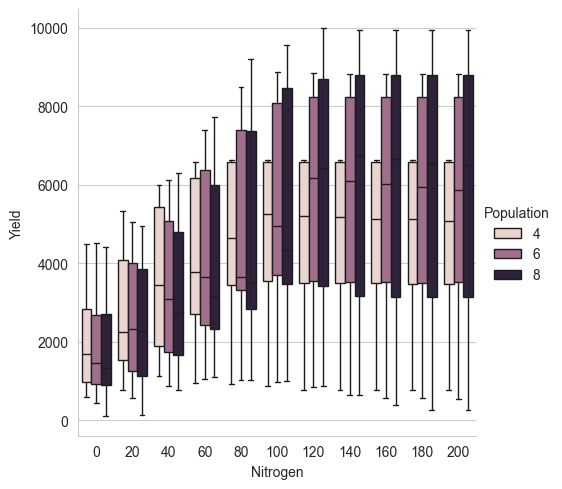

In [13]:
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot as plt
df= apsim.results 
df[['population' ]] = pd.Categorical(['Population'])
sns.catplot(x='Nitrogen', y='Yield', hue='Population', data=df, kind='box', )
plt.show()